# Exploratory Data Analysis 

This notebook goes over some basic exploration of data. 

It follows an excellent kaggle guide, which can be found [here.](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
plt.style.use('bmh')
# use the below line to get different plot styles
#print(plt.style.available)


## Data Input and Basic Clean-up of a Pandas Dataframe

In [3]:
# Read the TRAIN data into a dataframe to have a look
df = pd.read_csv('../Data/train_eda.csv')

In [4]:
#Automatically returns the first (n=5) rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Show all the column information
# Name ----- Number of Entries that are NOT Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [7]:
# Create new dataframe that only includes those with >30% non-null
thresh = 0.3
df2 = df[[col for col in df if df[col].count()/len(df) >= thresh]]
removed = [col for col in df if df[col].count()/len(df) < thresh]

print('List of columns below threshold of %0.2f%% :'%thresh)
for rem in removed:
    print('   '+rem)
    
# also remove ID, as it doesn't contain relevant info:
del df2['Id']

# looking at the data description, seems like it might be reasonable to also remove PoolArea (as it got zeros wherever PoolQC got nan)

List of columns below threshold of 0.30% :
   Alley
   PoolQC
   Fence
   MiscFeature


## Start to Actually Look at the Data

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


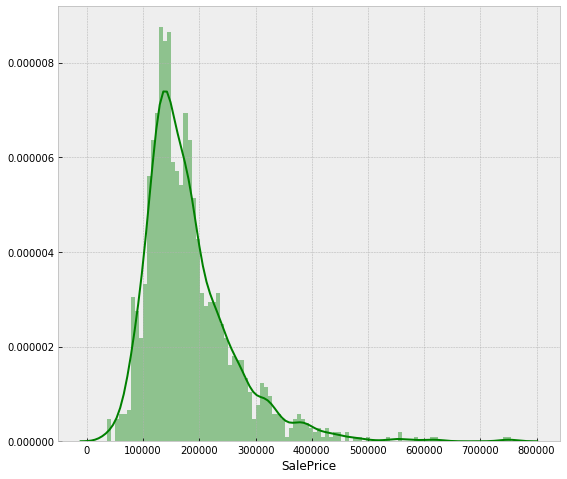

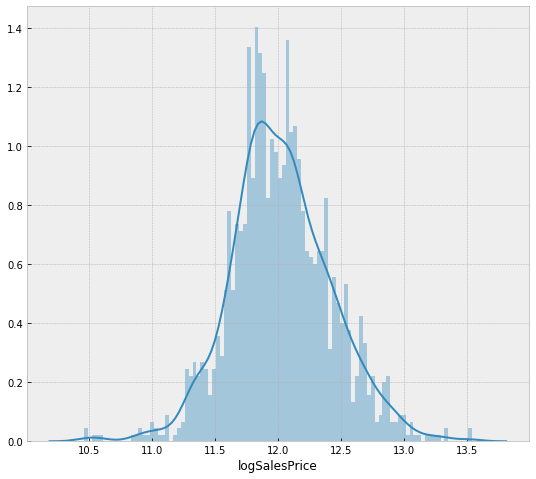

In [8]:
# Focus on Housing Price
hp = df['SalePrice']
print(hp.describe())
plt.figure(figsize=(9, 8))
sns.distplot(hp, color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

# Mentions that you could use log to remove the skewed right values to make it more gaussian
hplog = np.log(hp)
hplog.rename('logSalesPrice',inplace=True)
plt.figure(figsize=(9,8))
sns.distplot(hplog,bins=100)
plt.show()

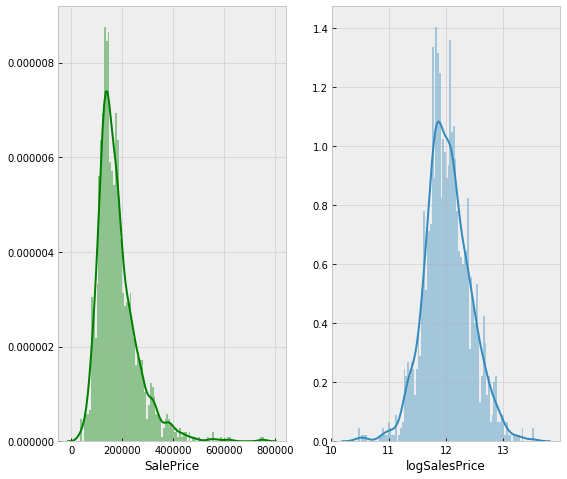

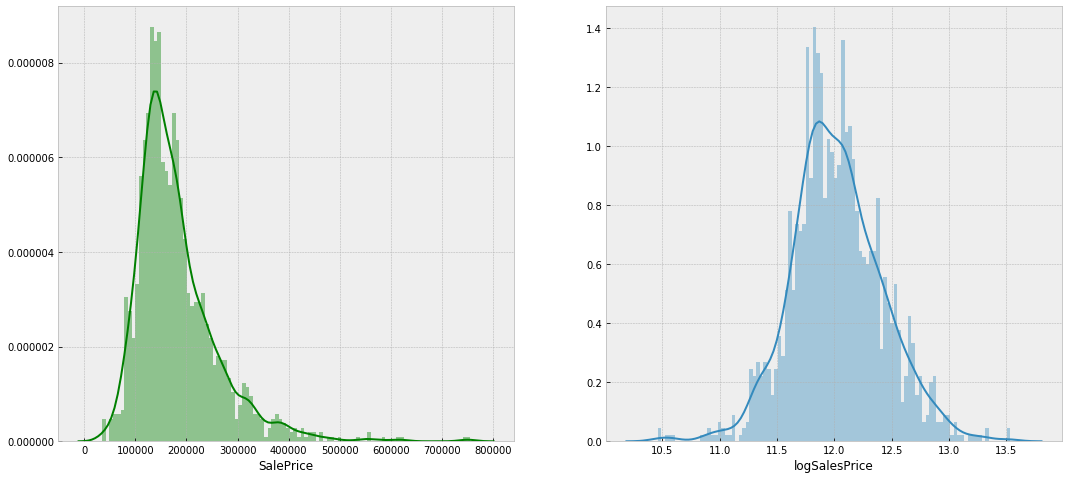

In [9]:
# Just plotting things
plt.figure(1,figsize=(9, 8))
plt.subplot(1,2,1)
sns.distplot(hp,color='g',bins=100)
plt.subplot(1,2,2)
sns.distplot(hplog,bins=100)
plt.show()


# different way
fig,ax = plt.subplots(1,2,figsize=(18,8))
sns.distplot(hp,color='g',bins=100,ax = ax[0])
sns.distplot(hplog,bins=100,ax = ax[1])
plt.show()

In [11]:
list(set(df2.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [14]:
# Look at only the numerical data
df_num = df2.select_dtypes(include=['int64','float64'])
df_num.head(n=5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


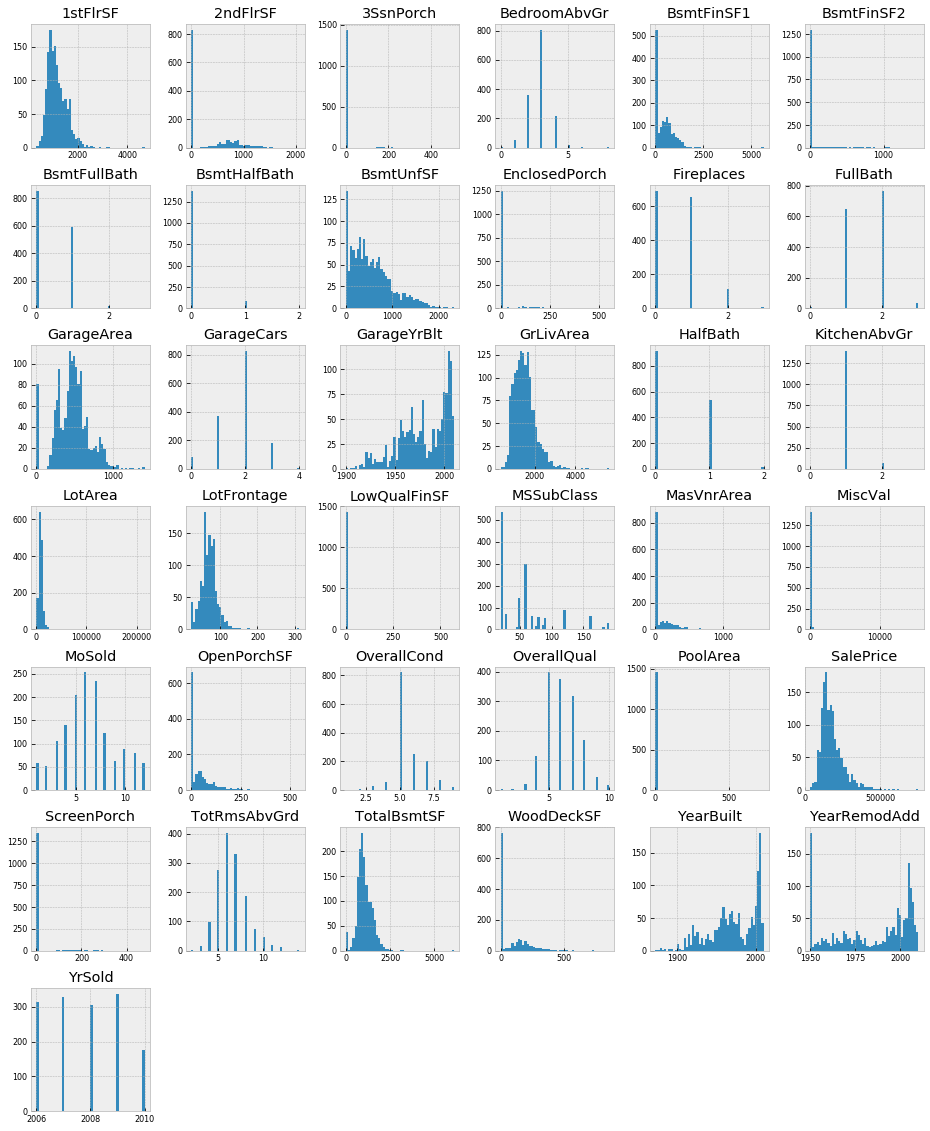

In [15]:
# Plot them all, only plots numerical data (df.hist and df_num.hist should be the same, minus the id)
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# Seem to have similiar results to saleprice: slight skew to right for ex in 1stFlrSF, GarageArea,...

In [18]:
# Look for correlations with salesprice
df_num_corr = df_num.corr()['SalePrice'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


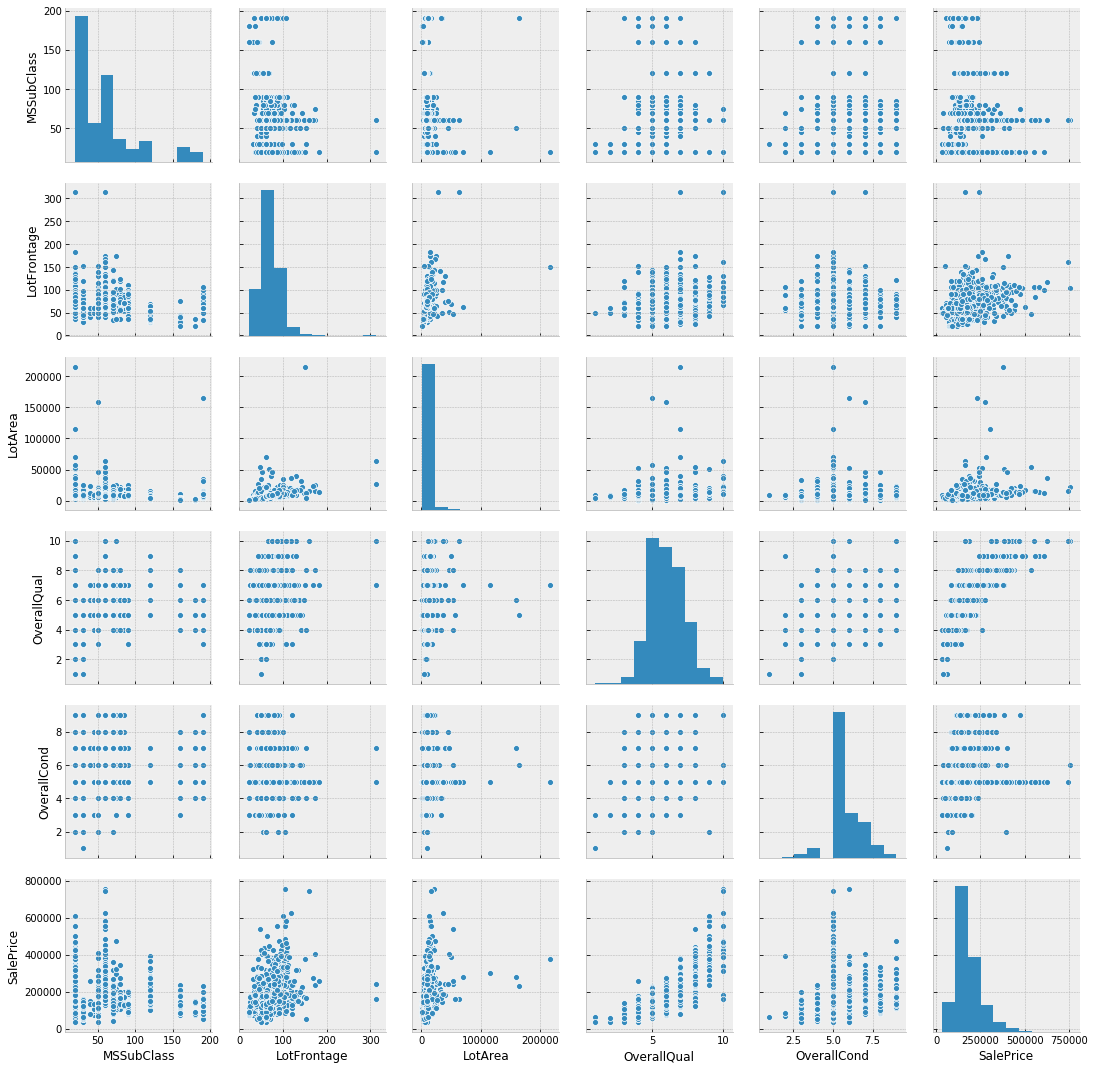

In [51]:
# Plot every single numerical correlation (too many here, so only do the first few)
# Note that this automatically plots histograms along the diagonal, correlation isn't useful info there
a = df_num.columns[0:5].tolist()
a.append('SalePrice')
sns.pairplot(df_num[a])
plt.show()

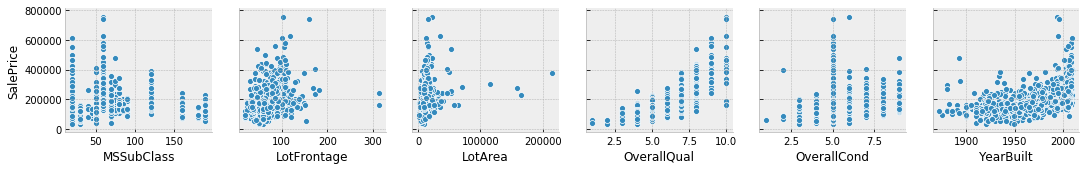

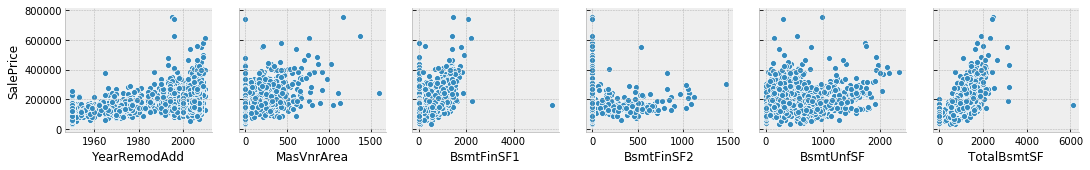

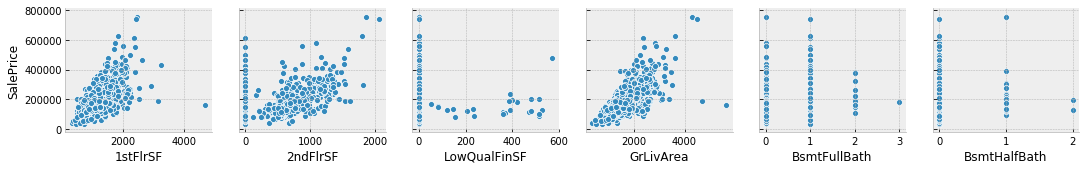

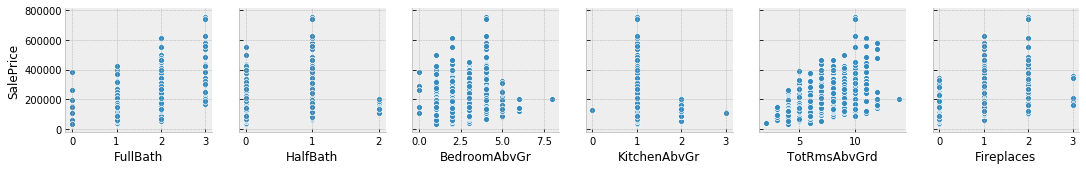

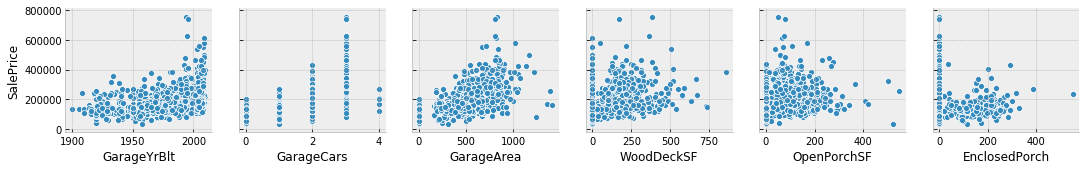

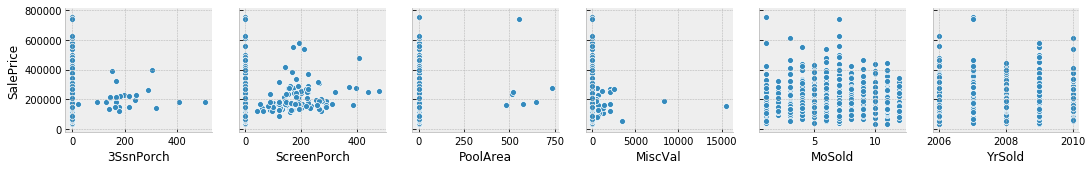

In [152]:
# Plot only the correlations with SalePrice
for i in range(0, len(df_num.columns)-1, 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+6],
                y_vars=['SalePrice'])

In [168]:
import operator
individual_features_df = []
for i,col in enumerate(df_num.columns[0:-1]): # -1 because the last column is SalePrice
    tmpDf = df_num[[col, 'SalePrice']]
    tmpDf = tmpDf[tmpDf[col] != 0]
    individual_features_df.append(tmpDf) # creates a list of DFs with just salesprice vs individual feature, so they can vary in size

## Basic Feature Selection Based On Correlations

In [95]:
# Create dictionary that has as a key the feature, and as a value the correlation with SalePrice
all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}

# sort the dictionary according to the correlation value
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1),reverse=True)
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))
    
# This produced a new large correlation: 2ndFlrSF

    OverallQual: 0.7909816005838047
      GrLivArea: 0.7086244776126511
       2ndFlrSF: 0.6733048324568383
     GarageCars: 0.6370954062078953
    TotalBsmtSF: 0.6096808188074366
     GarageArea: 0.6084052829168343
       1stFlrSF: 0.6058521846919166
       FullBath: 0.5745626737760816
   TotRmsAbvGrd: 0.5337231555820238
      YearBuilt: 0.5228973328794967
   YearRemodAdd: 0.5071009671113867
    GarageYrBlt: 0.48636167748786213
     BsmtFinSF1: 0.4716904265235731
     MasVnrArea: 0.4340902197568926
    LotFrontage: 0.35179909657067854
   LowQualFinSF: 0.3000750165550133
        LotArea: 0.2638433538714063
    ScreenPorch: 0.25543007954878405
  EnclosedPorch: 0.2412788363011751
     BsmtFinSF2: 0.19895609430836586
     WoodDeckSF: 0.19370601237520677
   BedroomAbvGr: 0.18093669310849045
      BsmtUnfSF: 0.16926100049514192
     Fireplaces: 0.1216605842136395
        MiscVal: 0.08896338917298924
    OpenPorchSF: 0.08645298857147708
      3SsnPorch: 0.06393243256889079
         MoSold: 0

In [101]:
# New 'good' features
golden_features_list = [(key,value) for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n".format(len(golden_features_list)))
for key,value in golden_features_list:
    print('{0: <14} : {1: 0.3f}'.format(key,value))

There is 11 strongly correlated values with SalePrice:

OverallQual    :  0.791
GrLivArea      :  0.709
2ndFlrSF       :  0.673
GarageCars     :  0.637
TotalBsmtSF    :  0.610
GarageArea     :  0.608
1stFlrSF       :  0.606
FullBath       :  0.575
TotRmsAbvGrd   :  0.534
YearBuilt      :  0.523
YearRemodAdd   :  0.507


In [244]:
df_all_corrs = df_num.corr()
df_all_corrs[abs(df_all_corrs)>0.5].sort_values(by = "SalePrice")

# Different option for getting all of the correlations that allows for making plots
df_num_nozero = df_num[df_num>0]
df_num_nozero
df_nozero_corrs = df_num_nozero.corr()['SalePrice'][:-1]
golden_features_list = df_nozero_corrs[abs(df_nozero_corrs) > 0.5].sort_values(ascending=False)
all_features_descending = df_nozero_corrs.sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
2ndFlrSF        0.673305
GarageCars      0.637095
TotalBsmtSF     0.609681
GarageArea      0.608405
1stFlrSF        0.605852
FullBath        0.574563
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


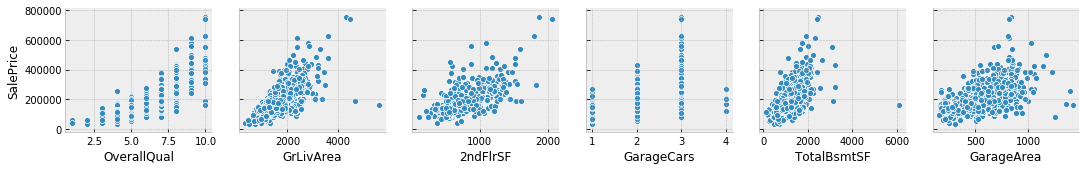

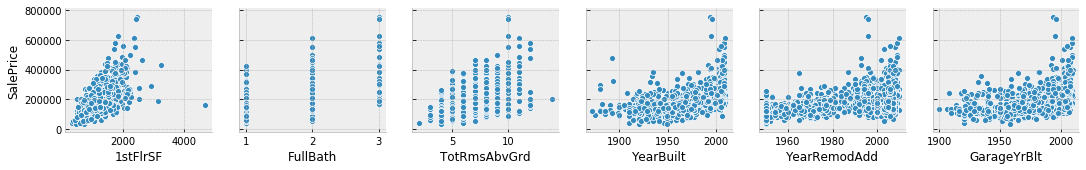

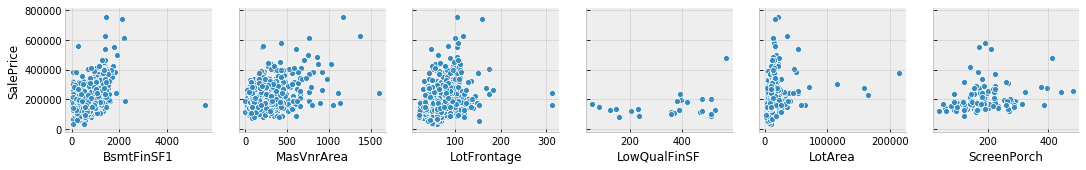

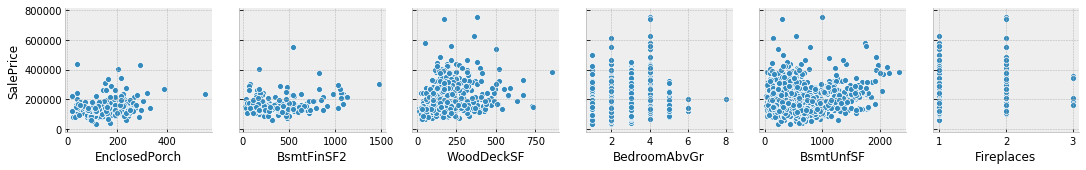

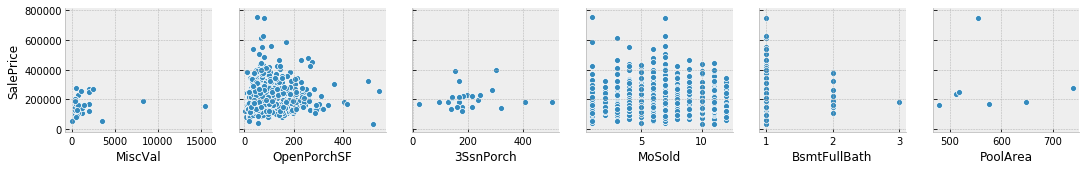

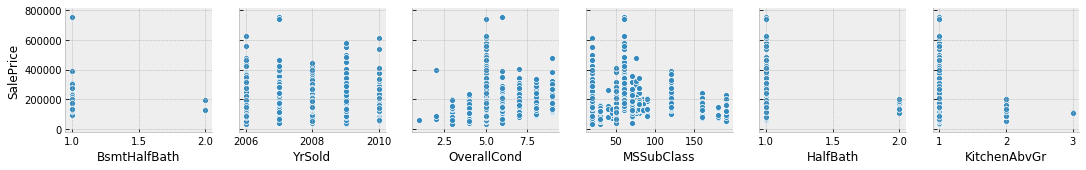

In [238]:
# Plot the correlations with all the zeros removed
# Order them from most to least correlated
for i in range(0, len(df_num.columns)-1, 6):
    sns.pairplot(data=df_num_nozero,
                x_vars=all_features_descending.index[i:i+6],
                y_vars=['SalePrice'])
plt.show()


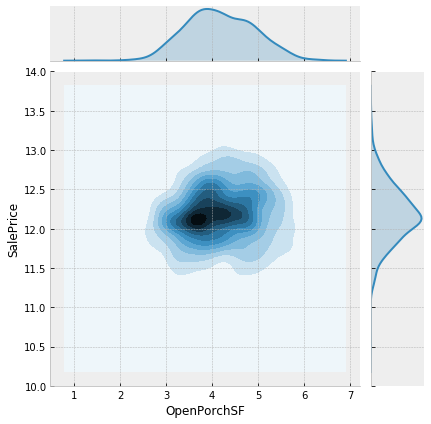

In [223]:
# also make a joint plot for some data
# taking log to normalize better
sns.jointplot(np.log(df_num_nozero['OpenPorchSF']),np.log(df_num_nozero['SalePrice']),kind='kde')
plt.show()

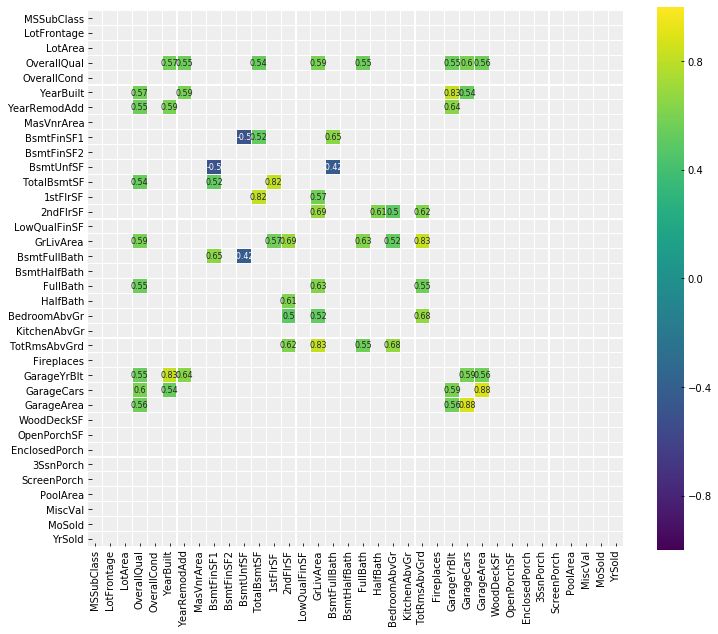

In [233]:
# Look at just the correlations
# Let's take out the SalePrice variable for now, compare everything else
df_noSP = df_num.drop('SalePrice',axis=1)
corr = df_noSP.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr[((corr>=0.5)&(corr<1))|(corr<-0.4)], # Only color those that are highly correlated
            cmap='viridis',vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Can look at the large correlations to see if there are meaningful ways to combine the data to reduce # of features

## Feature Selection based on Data Type

In [248]:
# Let's only look at the truly quantitative data (IE not categorical)
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df_num[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [245]:
# Further to that, only take the ones we already figured are strongly correlated (>.5)
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

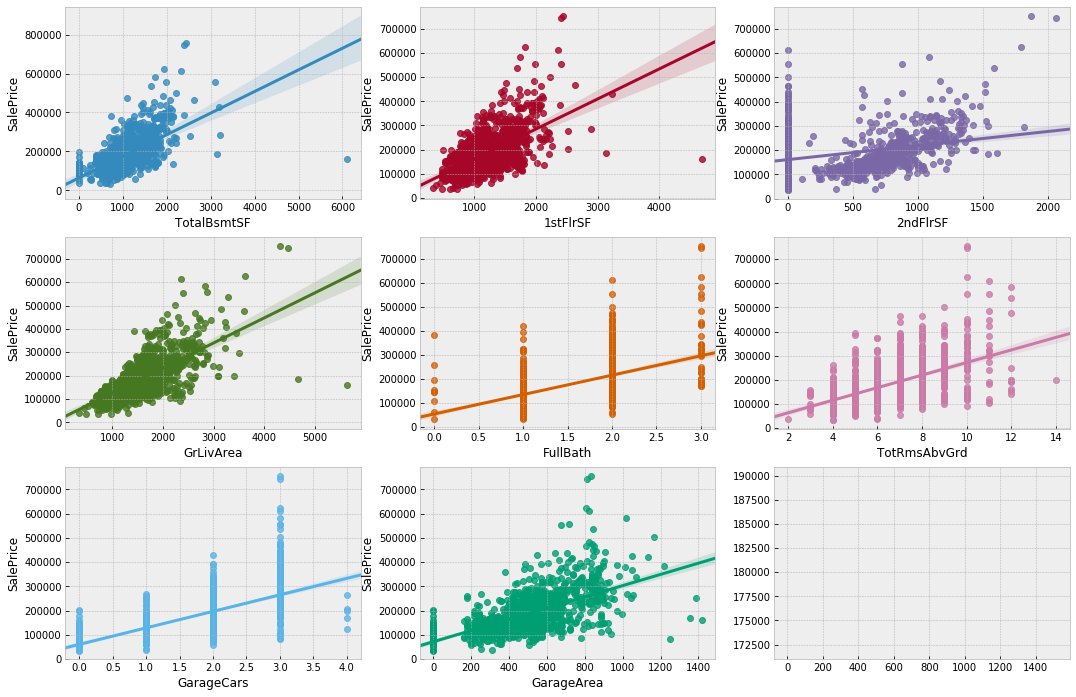

In [247]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df_num[features_to_analyse], ax=ax)

# Qualitative / Categorical Data

In [306]:
# Now lets look at the categorical data

categorical_features = [a for a in df2.columns.tolist() if a not in quantitative_features_list[:-1]]
df_categ = df2[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [293]:
#Non numerical features
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [317]:
# Different ways to change the categorical stuff into category type
df_not_num.head()
df_not_num.loc[:,'Street'] = df_not_num.loc[:,'Street'].astype('category')
#df_not_num.loc[:,'Street'] = df_not_num.loc[:,'Street'].cat.codes
#pd.factorize(df_not_num['Street'])[0]
#df_not_num.loc[:,'Street'] = pd.factorize(df_not_num['Street'])[0]
#df_not_num.dtypes
df_not_num.loc[:,'MSZoning']=df_not_num['MSZoning'].astype('category')
pd.get_dummies(df_not_num).head(n=20)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


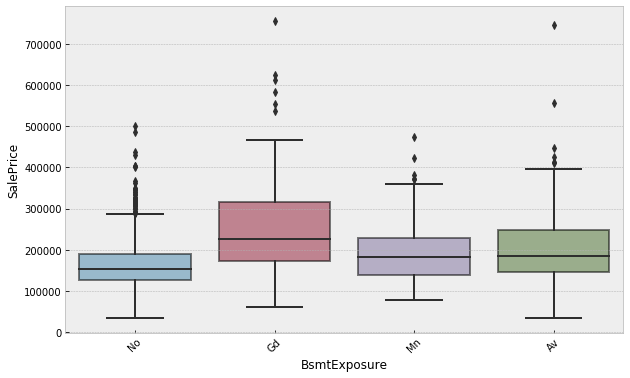

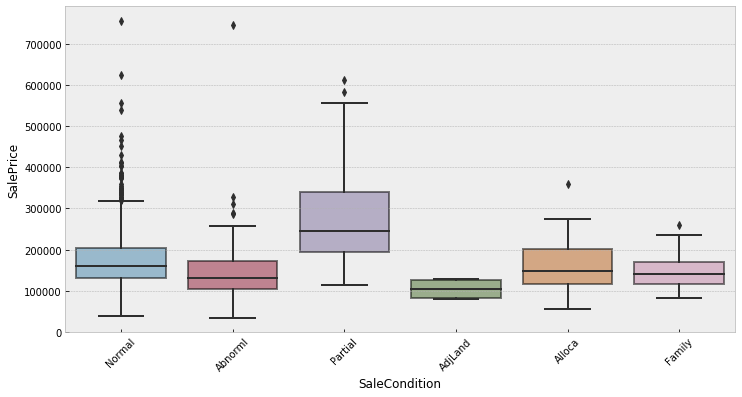

In [314]:
# Plotting categorical data
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

# Can look for more information this way

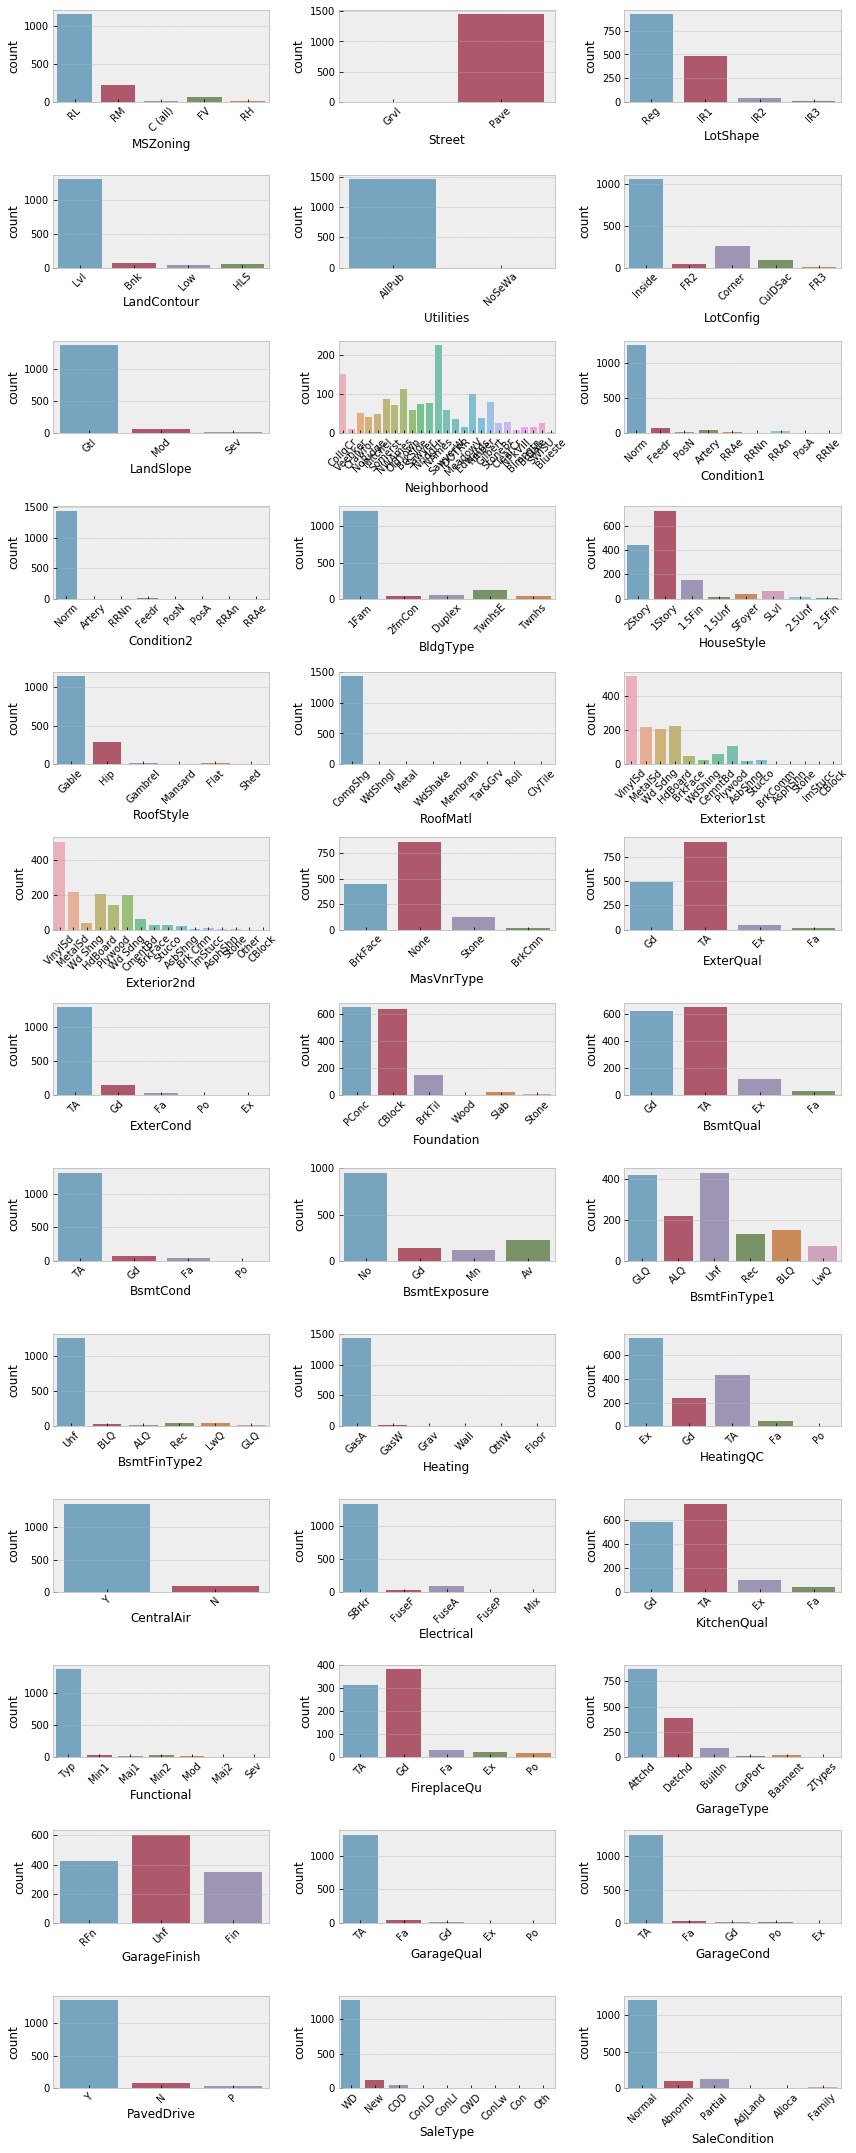

In [315]:
# how are they distributed 
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()